In [3]:
!pip install scikit-survival
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sksurv.nonparametric import kaplan_meier_estimator
import math
# from google.colab import files

In [ ]:
#uploaded=files.upload()

Saving finalDataset.csv to finalDataset.csv


In [ ]:
df = pd.read_csv('finalDataset.csv')
float_df = df["Pressure Array"].apply(lambda x: [float(el) for el in x.strip("[]").split(",")])
df["Pressure Array"] = float_df

In [ ]:
from scipy import integrate

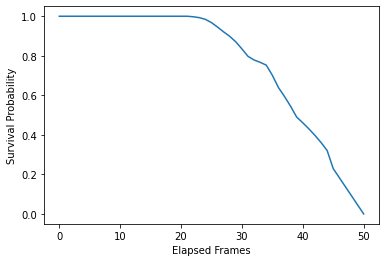

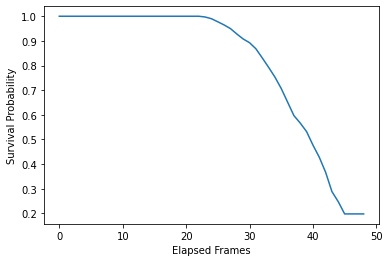

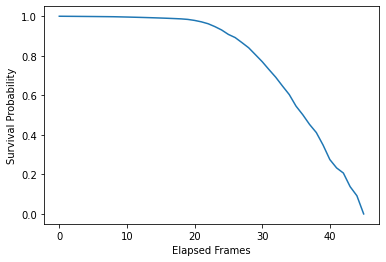

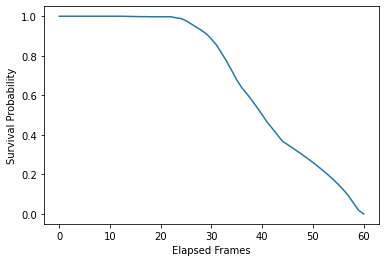

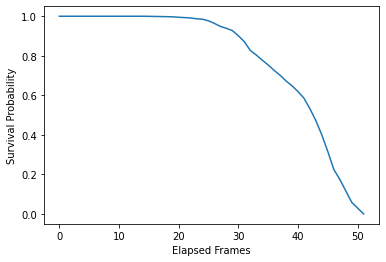

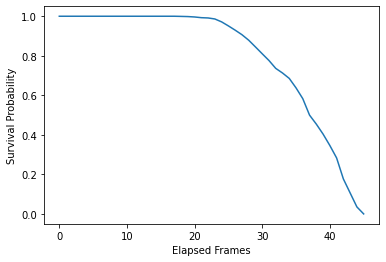

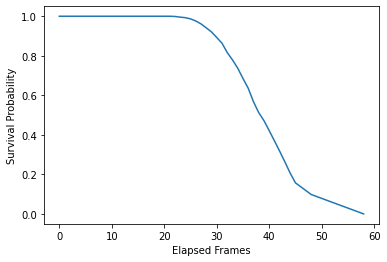

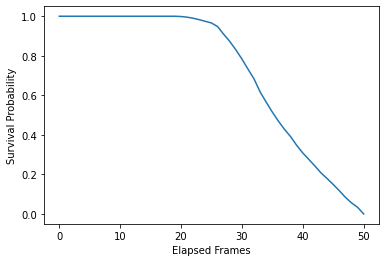

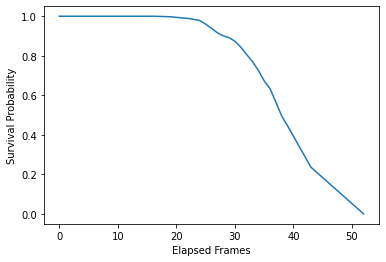

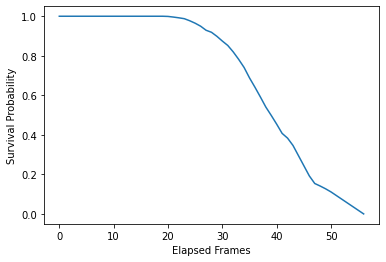

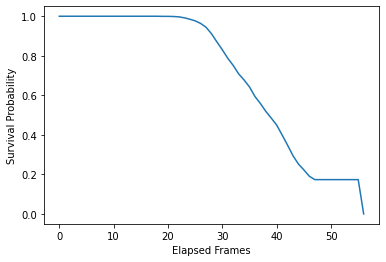

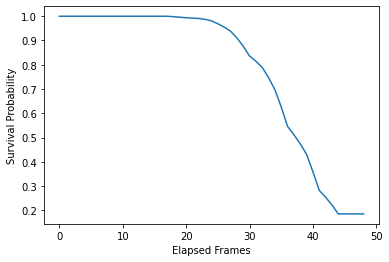

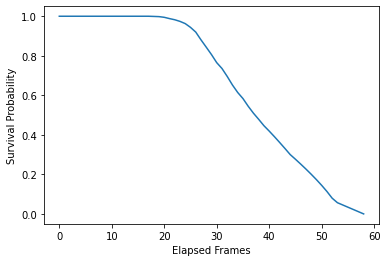

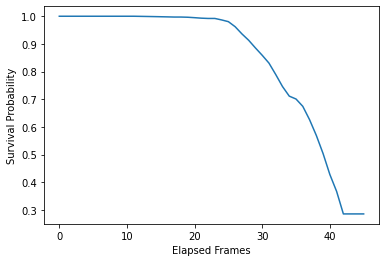

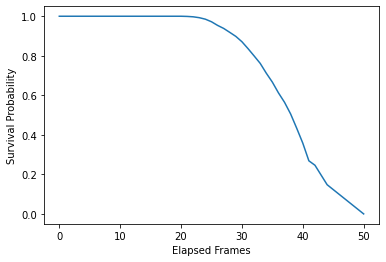

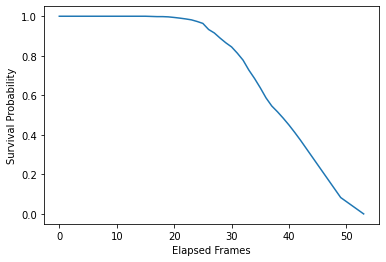

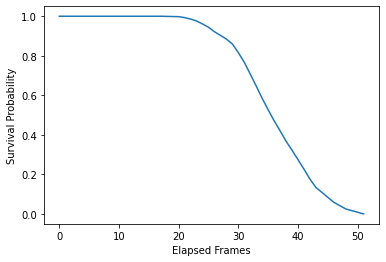

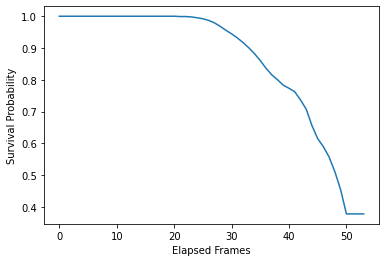

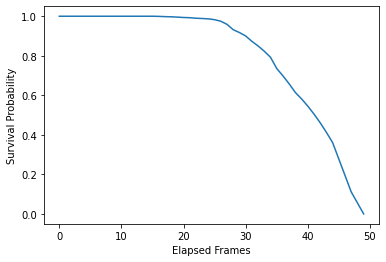

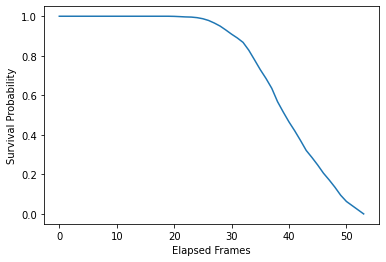

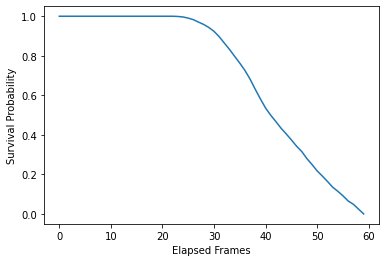

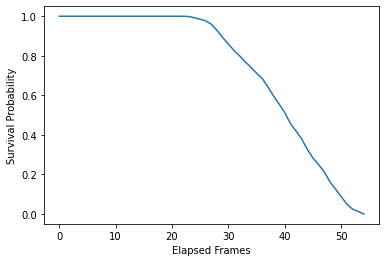

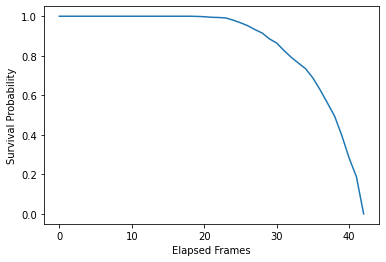

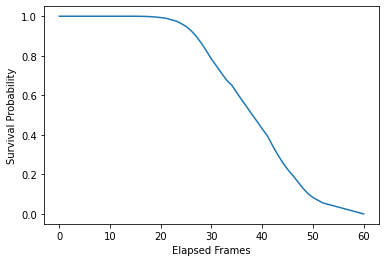

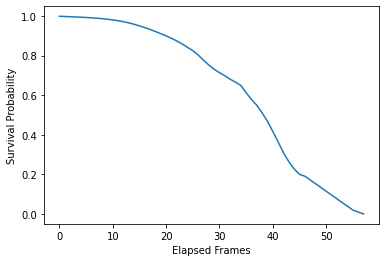

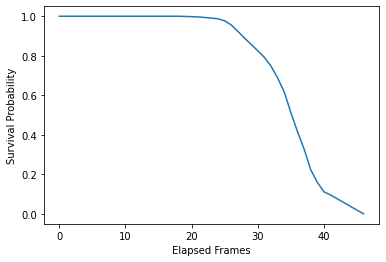

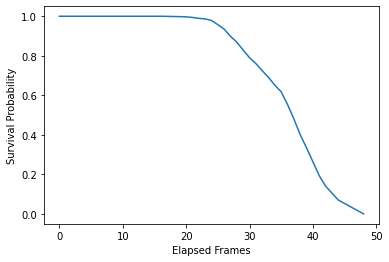

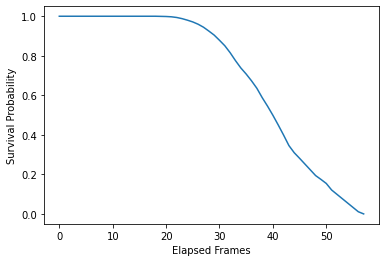

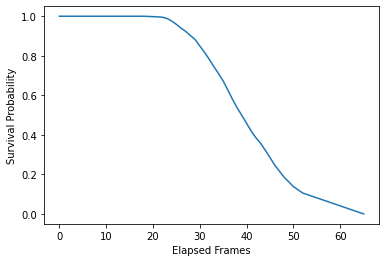

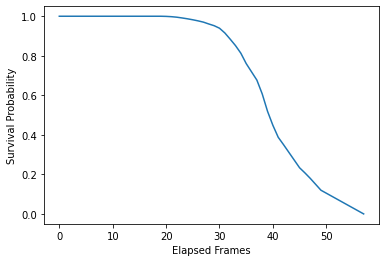

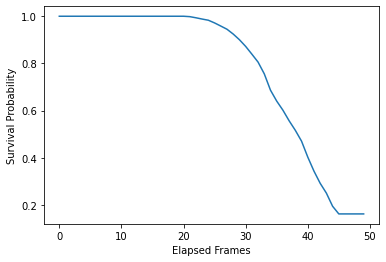

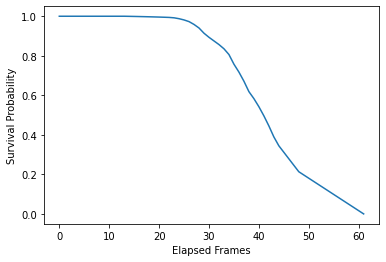

In [ ]:
all_team_pressures = []
all_team_survival_auc = []
teams = df["possessionTeam"].unique()
for team in teams:
  team_pressure_array = [team]
  team_survival_auc = [team]
  team_df = df.loc[df["possessionTeam"]==team]
  team_pressure = team_df['Pressure Array']
  lst = []
  for index, row in team_df.iterrows():
    lst.append(row['Pressure Array'])
  lst_df = pd.DataFrame(lst)
  survival_curve = create_survival_analysis(lst_df)
  survival_value = 1 - survival_curve['Pressure']
  survival_auc = integrate.simpson(np.array(survival_value), np.array(survival_curve['Frame']))
  team_survival_auc.append(survival_auc)
  all_team_survival_auc.append(team_survival_auc)

In [ ]:
print(all_team_survival_auc)

[['DAL', 234.08102303458202], ['TB', 206.82560354185458], ['ATL', 137.4614652044093], ['PHI', 148.65037887754693], ['BUF', 144.65316778962176], ['PIT', 152.4142921222137], ['NYJ', 204.34326671312613], ['CAR', 249.1494650386042], ['MIN', 98.32655304942706], ['CIN', 122.59576308019584], ['DET', 345.9989623509332], ['SF', 77.06242484030116], ['HOU', 39.21329850509449], ['JAX', 332.174458009423], ['IND', 235.68937792702286], ['SEA', 134.84717674216876], ['TEN', 249.2770891652644], ['ARI', 64.7121180205617], ['LAC', 101.3240394024182], ['WAS', 270.7847116712677], ['CLE', 49.790740008389086], ['KC', 118.43718803495219], ['NE', 242.6682443548609], ['MIA', 162.70317825795087], ['NO', 67.3179355679939], ['GB', 104.38069581246594], ['NYG', 189.15532580391056], ['DEN', 261.8546897549052], ['CHI', 139.7055575697697], ['LA', 228.27138954727968], ['LV', 218.8900039977973], ['BAL', 90.22439594405994]]


In [ ]:
def create_survival_analysis(df):

    frames = []
    pressure_values = []

    for _, row in df.iterrows():
        cur_frames = []
        cur_pressure_values = []
        for frame in range(len(df.columns)):
            if not math.isnan(row[frame]):
                cur_frames.append(frame)
                cur_pressure_values.append(row[frame])
        pressure_values.extend(cur_pressure_values)
        frames.extend(cur_frames)

    survival_values = pd.DataFrame({'Frame': frames, 'Pressure': pressure_values})
    survival_values['g90'] = np.where(survival_values['Pressure'] >= 1, True, False)

    pred_frame, pred_survival_prob = kaplan_meier_estimator(survival_values["g90"], survival_values["Frame"])
    plt.plot(pred_frame, pred_survival_prob)
    plt.ylabel("Survival Probability")
    plt.xlabel("Elapsed Frames")
    plt.show()
    return survival_values

In [ ]:
def create_hazard_analysis(df):
  